In [3]:
import numpy as np
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
data_loc = '/project/wyin/jlee/ml-project/dos-prediction/data'
print(os.getcwd())

/project/wyin/jlee/ml-project/dos-prediction/nearest-neighbors


In [5]:
train_set = np.load(os.path.join(data_loc, 'train-set.npz'))
train_params = train_set['params']
train_dos = train_set['dos']

In [6]:
val_set = np.load(os.path.join(data_loc, 'val-set.npz'))
val_params = val_set['params']
val_dos = val_set['dos']

In [7]:
test_set = np.load(os.path.join(data_loc, 'test-set.npz'))
test_params = test_set['params']
test_dos = test_set['dos']

In [10]:
scaler = StandardScaler()
train_params_scaled = scaler.fit_transform(train_params)
val_params_scaled = scaler.transform(val_params)

In [28]:
#w averaging
train_dos_avg = []
for i, dos in enumerate(train_dos):
    avg = []
    for j in range(dos.size):
        if j == 0:
            avg.append(0.7 * dos[0] + 0.3 * dos[1])
        elif j == dos.size - 1:
            avg.append(0.7 * dos[j] + 0.3 * dos[j - 1])
            
        else:
            avg.append(0.2 * dos[j - 1] + 0.2 * dos[j + 1] + 0.6 * dos[j])
            
    train_dos_avg.append(avg)
    if (i % 1000 == 0):
        print(f"completed {i}")
    
train_dos_avg = np.array(train_dos_avg)

completed 0
completed 1000
completed 2000
completed 3000
completed 4000
completed 5000
completed 6000
completed 7000
completed 8000
completed 9000
completed 10000
completed 11000
completed 12000
completed 13000
completed 14000
completed 15000
completed 16000
completed 17000
completed 18000
completed 19000
completed 20000
completed 21000
completed 22000
completed 23000
completed 24000
completed 25000
completed 26000
completed 27000
completed 28000
completed 29000
completed 30000
completed 31000
completed 32000
completed 33000
completed 34000
completed 35000
completed 36000
completed 37000
completed 38000
completed 39000
completed 40000
completed 41000
completed 42000
completed 43000
completed 44000
completed 45000
completed 46000
completed 47000
completed 48000
completed 49000
completed 50000
completed 51000
completed 52000
completed 53000
completed 54000
completed 55000
completed 56000
completed 57000
completed 58000
completed 59000
completed 60000
completed 61000
completed 62000
compl

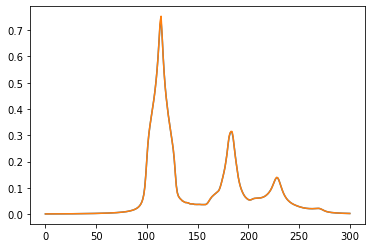

In [29]:
plt.plot(train_dos_avg[0])
plt.plot(train_dos[0])

In [30]:
knn_mse_uniform = []
for i in range(1, 20):
    print(f"trying n neights = {i}")
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(train_params_scaled, train_dos_avg)
    predicted = neigh.predict(val_params_scaled)
    
    mse = np.mean((val_dos - predicted)**2)
    knn_mse_uniform.append(mse)

knn_mse_uniform = np.array(knn_mse_uniform)

trying n neights = 1
trying n neights = 2
trying n neights = 3
trying n neights = 4
trying n neights = 5
trying n neights = 6
trying n neights = 7
trying n neights = 8
trying n neights = 9
trying n neights = 10
trying n neights = 11
trying n neights = 12
trying n neights = 13
trying n neights = 14
trying n neights = 15
trying n neights = 16
trying n neights = 17
trying n neights = 18
trying n neights = 19


6.333071016882485e-05
4


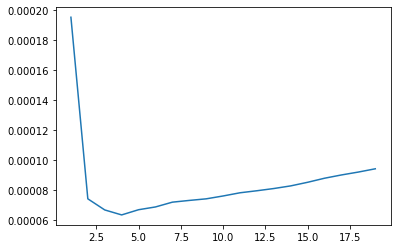

In [31]:
plt.plot(np.arange(1, 20), knn_mse_uniform)
print(np.min(knn_mse_uniform))
print(np.argmin(knn_mse_uniform) + 1)

In [23]:
knn_mse_weighted = []
def WeightFunc(distances):
    return distances ** -4
for i in range(1, 20):
    print(f'trying n neighs = {i}')
    neigh = KNeighborsRegressor(n_neighbors = i, weights = WeightFunc)
    neigh.fit(train_params_scaled, train_dos_avg)
    predicted = neigh.predict(val_params_scaled)
    
    mse = np.mean((val_dos - predicted)**2)
    knn_mse_weighted.append(mse)

knn_mse_weighted = np.array(knn_mse_weighted)

trying n neighs = 1
trying n neighs = 2
trying n neighs = 3
trying n neighs = 4
trying n neighs = 5
trying n neighs = 6
trying n neighs = 7
trying n neighs = 8
trying n neighs = 9
trying n neighs = 10
trying n neighs = 11
trying n neighs = 12
trying n neighs = 13
trying n neighs = 14
trying n neighs = 15
trying n neighs = 16
trying n neighs = 17
trying n neighs = 18
trying n neighs = 19


7.677467820579203e-05
4


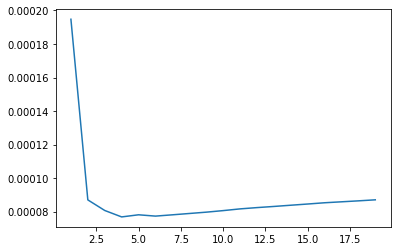

In [24]:
plt.plot(np.arange(1, 20), knn_mse_weighted)
print(np.min(knn_mse_weighted))
print(np.argmin(knn_mse_weighted) + 1)